In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import scipy as sp
import datajoint as dj

In [3]:
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, tracking
from pipeline.plot import behavior_plot

Connecting root@127.0.0.1:3306


In [7]:
session_keys = experiment.Session.fetch('KEY')

In [8]:
session_key = session_keys[0]

# Plot proportional 'correct' for one session

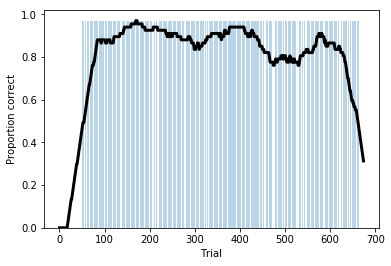

In [15]:
behavior_plot.plot_correct_proportion(session_key)

# Plot proportional 'correct' for one session, modulated by photostim

In [19]:
photostims = experiment.Photostim * experiment.BrainLocation

In [21]:
left_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="left"').fetch1('KEY')
right_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="right"').fetch1('KEY')
bi_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="both"').fetch1('KEY')

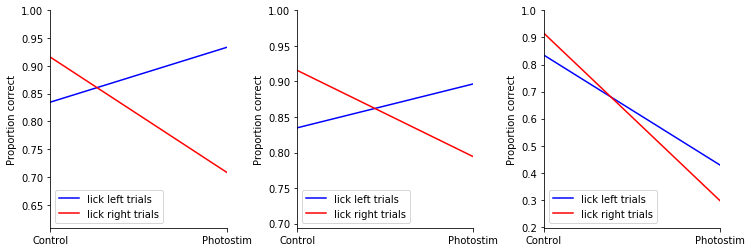

In [78]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.subplots_adjust(wspace=0.4)
behavior_plot.plot_photostim_effect(session_key, left_alm_photostim, axis=axs[0])
behavior_plot.plot_photostim_effect(session_key, right_alm_photostim, axis=axs[1])
behavior_plot.plot_photostim_effect(session_key, bi_alm_photostim, axis=axs[2])

# Plot movement tracking 
(which unit(s) to plot the spikes from?)

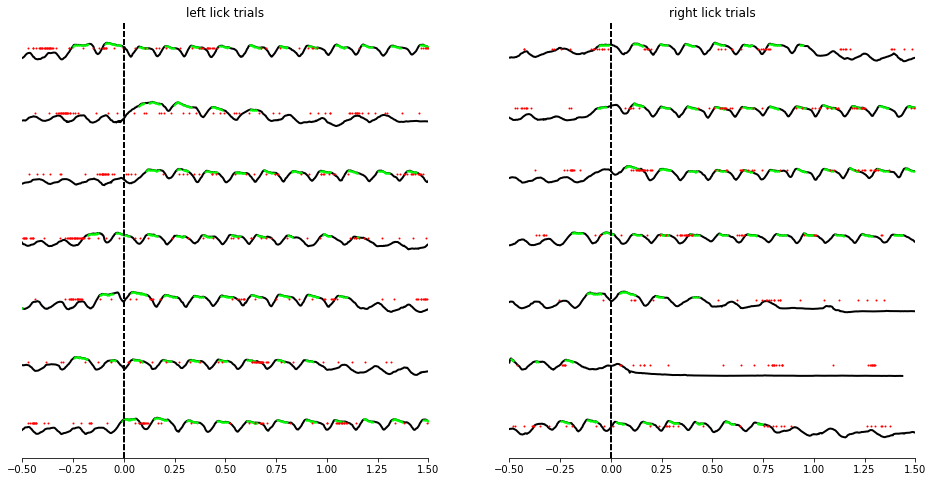

In [293]:
behavior_plot.plot_jaw_movement(session_key, trial_limit=7)

In [236]:
ephys.TrialSpikes()

subject_id institution 6 digit animal ID,session session number,insertion_number,unit,trial trial number,"spike_times (s) spike times for each trial, relative to go cue"
435884,1,1,0,150,=BLOB=
435884,1,1,4,150,=BLOB=
435884,1,1,5,150,=BLOB=
435884,1,1,7,150,=BLOB=
435884,1,1,8,150,=BLOB=
435884,1,1,9,150,=BLOB=
435884,1,1,10,150,=BLOB=


In [239]:
experiment.SessionTrial * ephys.Unit

subject_id institution 6 digit animal ID,session session number,trial trial number,insertion_number,unit,trial_uid unique across sessions/animals,start_time (s) relative to session beginning,stop_time (s) relative to session beginning,unit_uid unique across sessions/animals,unit_quality,probe unique identifier for this model of probe (e.g. part number),electrode_config_id hash of the group and group_member (ensure uniqueness),electrode_group electrode group,electrode electrode,unit_posx (um) x position of the unit on the probe,unit_posy (um) y position of the unit on the probe,spike_times (s),unit_amp,unit_snr,waveform average spike waveform
435884,1,0,1,0,0,0.5000,4.1717,0,good,15131808323,18fd56922c9f76773ad5ad288619ab51,0,6,42.4544792175293,33.699256896972656,=BLOB=,294.20157,13.780584,=BLOB=
435884,1,0,1,1,0,0.5000,4.1717,1,all,15131808323,18fd56922c9f76773ad5ad288619ab51,0,4,29.585512161254883,14.670790672302246,=BLOB=,344.143,16.491089,=BLOB=
435884,1,0,1,2,0,0.5000,4.1717,2,all,15131808323,18fd56922c9f76773ad5ad288619ab51,0,5,16.062057495117188,38.767662048339844,=BLOB=,287.36014,10.473887,=BLOB=
435884,1,0,1,3,0,0.5000,4.1717,3,all,15131808323,18fd56922c9f76773ad5ad288619ab51,0,5,15.020341873168945,43.26382827758789,=BLOB=,154.78827,7.615032,=BLOB=
435884,1,0,1,4,0,0.5000,4.1717,4,good,15131808323,18fd56922c9f76773ad5ad288619ab51,0,5,14.338550567626953,38.978546142578125,=BLOB=,157.83987,7.869556,=BLOB=
435884,1,0,1,5,0,0.5000,4.1717,5,all,15131808323,18fd56922c9f76773ad5ad288619ab51,0,6,40.072269439697266,45.23943328857422,=BLOB=,161.41177,7.1355534,=BLOB=
435884,1,0,1,6,0,0.5000,4.1717,6,all,15131808323,18fd56922c9f76773ad5ad288619ab51,0,7,1.4678318500518799,61.98297882080078,=BLOB=,215.175,12.520164,=BLOB=


In [240]:
trk = (tracking.Tracking.JawTracking * tracking.Tracking.TongueTracking
       * experiment.BehaviorTrial & session_key & experiment.ActionEvent)
tracking_fs = float((tracking.TrackingDevice & tracking.Tracking & session_key).fetch1('sampling_rate'))

l_trial_trk = trk & 'trial_instruction="left"' & 'early_lick="no early"'
r_trial_trk = trk & 'trial_instruction="right"' & 'early_lick="no early"'

In [242]:
trs = r_trial_trk.fetch(as_dict=True, limit=20)

In [243]:
tr = trs[3]

In [245]:
tr

{'subject_id': 435884,
 'session': 1,
 'trial': 87,
 'tracking_device': 'Camera 0',
 'jaw_x': array([249.53805828, 249.27336311, 248.17350721, ..., 221.03989792,
        221.14310741, 221.26390266]),
 'jaw_y': array([388.60717106, 387.58800268, 387.86436892, ..., 392.37601376,
        392.45216131, 392.29305077]),
 'jaw_likelihood': array([1., 1., 1., ..., 1., 1., 1.]),
 'tongue_x': array([427.0300504 , 427.39710766, 427.20981246, ..., 424.72591496,
        424.78438044, 424.6214664 ]),
 'tongue_y': array([265.81204891, 265.60059166, 265.67803526, ..., 276.24232233,
        276.1829409 , 276.30340207]),
 'tongue_likelihood': array([5.77089565e-07, 8.13767656e-07, 6.93144386e-07, ...,
        1.10125829e-05, 1.11157124e-05, 1.14343547e-05]),
 'task': 'audio delay',
 'task_protocol': 1,
 'trial_instruction': 'right',
 'early_lick': 'no early',
 'outcome': 'miss'}

In [247]:
(ephys.TrialSpikes & r_trial_trk)

subject_id institution 6 digit animal ID,session session number,insertion_number,unit,trial trial number,"spike_times (s) spike times for each trial, relative to go cue"
435884,1,1,0,251,=BLOB=
435884,1,1,4,251,=BLOB=
435884,1,1,5,251,=BLOB=
435884,1,1,6,251,=BLOB=
435884,1,1,7,251,=BLOB=
435884,1,1,8,251,=BLOB=
435884,1,1,9,251,=BLOB=


======================================================================================

In [290]:
importlib.reload(behavior_plot)

<module 'pipeline.plot.behavior_plot' from 'C:\\Users\\thinh\\Documents\\TN-Vathes\\MAP\\map-ephys\\pipeline\\plot\\behavior_plot.py'>